In [42]:
import pandas as pd
import folium

# Lista de coordenadas de latitude e longitude para a rota
df_dados_entrega = pd.read_csv('dados_entrega.csv')
coordenadas = []
for latitude,longitude in df_dados_entrega[['latitude','longitude']].values:
    coordenadas.append((latitude,longitude))
# latitudes = []
# for latitude in df_dados_entrega['latitude'].values:
#     latitudes.append((latitude))

# longitudes = []
# for longitude in df_dados_entrega['longitude'].values:
#     longitudes.append((longitude))

# longitudes[:3]
# coordenadas[:3]
# Mapa centrado em uma coordenada inicial
mapa = folium.Map(location=[-22.91346, -43.22757], zoom_start=10)


# Rota ao mapa
folium.PolyLine(locations=coordenadas, color='blue').add_to(mapa)

# Exibição do mapa
mapa.save('mapa_com_rota.html')

coordenada_inicio = (-22.91346, -43.22757)  # Coordenada de início
coordenadas_entrega = [(-22.88089, -43.22533), (-22.88957, -43.2362), (-22.90929, -43.18358)]  # Coordenadas de entrega

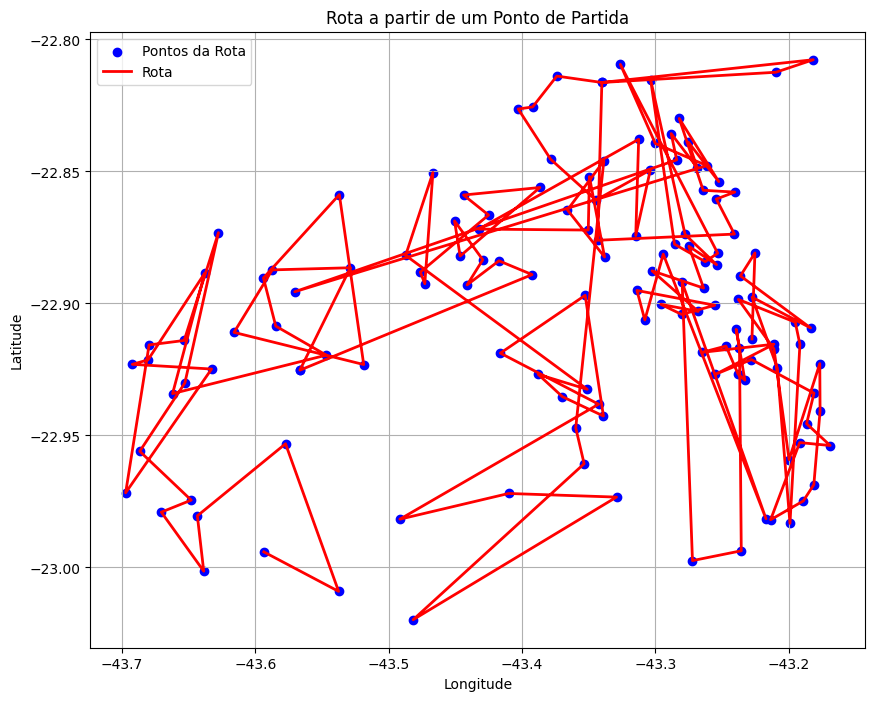

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Coordenada de partida (latitude e longitude)
start_latitude = -22.91346
start_longitude = -43.22757

# Coordenadas dos pontos de destino (ou intermediários)
# destination_coordinates = [(-22.88089, -43.22533), (-22.88957, -43.2362), (-22.90929, -43.18358)]
df_dados_entrega = pd.read_csv('dados_entrega.csv')
destination_coordinates = []
for latitude,longitude in df_dados_entrega[['latitude','longitude']].values:
    destination_coordinates.append((latitude,longitude))


# Crie uma lista de coordenadas da rota (incluindo o ponto de partida)
route_coordinates = [(start_latitude, start_longitude)] + destination_coordinates

# Separe as coordenadas de latitude e longitude em listas separadas
latitudes, longitudes = zip(*route_coordinates)

plt.figure(figsize=(10, 8))
plt.scatter(longitudes, latitudes, c='blue', marker='o', label='Pontos da Rota')
plt.plot(longitudes, latitudes, linestyle='-', color='red', linewidth=2, label='Rota')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rota a partir de um Ponto de Partida')
plt.legend()
plt.grid(True)
plt.show()



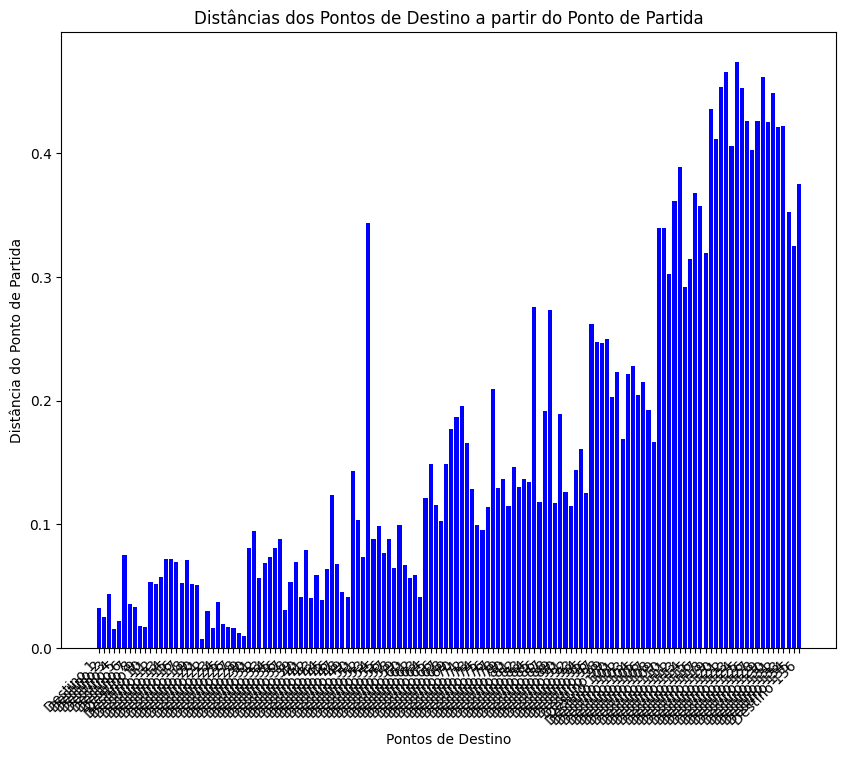

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Coordenadas da escola (ponto de partida)
school_latitude = -22.91346
school_longitude = -43.22757

# Coordenadas dos pontos de destino
df_dados_entrega = pd.read_csv('dados_entrega.csv')
destination_coordinates = []
for latitude,longitude in df_dados_entrega[['latitude','longitude']].values:
    destination_coordinates.append((latitude,longitude))

# destination_coordinates = [
#     (-22.91346, -43.22757),  # A própria escola (pode ser excluída se não for necessária)
#     (-22.91234, -43.22890),
#     (-22.91456, -43.22612),
#     (-22.91345, -43.22800),
#     # Adicione mais coordenadas de pontos de destino conforme necessário
# ]

def calcular_distancia(lat1, lon1, lat2, lon2):
    # Use uma fórmula de cálculo de distância, como a fórmula de Haversine
    # Neste exemplo, usamos a distância euclidiana simples para ilustrar
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

distancias = [calcular_distancia(school_latitude, school_longitude, lat, lon) for lat, lon in destination_coordinates]

# Etiquetas para os pontos de destino (opcional)
destino_labels = [f'Destino {i+1}' for i in range(len(destination_coordinates))]

# Crie o gráfico de barras
plt.figure(figsize=(10, 8))
plt.bar(destino_labels, distancias, color='blue')
plt.xlabel('Pontos de Destino')
plt.ylabel('Distância do Ponto de Partida')
plt.title('Distâncias dos Pontos de Destino a partir do Ponto de Partida')
plt.xticks(rotation=45, ha="right")
plt.show()

